Analysis of Occupancy Rate and Revenue by Geographic Locations(Zipcode)

In [81]:
#Loading dataset and picking relevant columns for analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
airbnb_data = pd.read_csv('/content/airbnb_Chicago.csv')

# Selecting relevant columns
relevant_columns = ['revenue', 'booked_days', 'occupancy_rate',
                    'Neighborhood', 'Zipcode', 'census_tract',
                    'Latitude', 'Longitude', 'Property Type',
                    'Listing Type', 'Bedrooms','Bathrooms']
geo_data = airbnb_data[relevant_columns]

# Basic summary statistics
print(geo_data.describe())

             revenue   booked_days  occupancy_rate        Zipcode  \
count   82109.000000  82109.000000    82109.000000  120217.000000   
mean     3300.798597     25.501906        0.191424   60627.669157   
std      4697.693382     19.876955        0.179504      18.036717   
min        10.000000      1.000000        0.004082   60601.000000   
25%       835.000000      9.000000        0.067010   60613.000000   
50%      1970.000000     22.000000        0.147368   60622.000000   
75%      4078.000000     37.000000        0.250000   60646.000000   
max    154197.000000    220.000000        1.000000   60661.000000   

       census_tract       Latitude      Longitude       Bedrooms  \
count  1.202170e+05  120217.000000  120217.000000  120206.000000   
mean   1.703131e+10      41.903247     -87.663203       1.531038   
std    2.859100e+05       0.055340       0.038884       1.049991   
min    1.703101e+10      41.630360     -87.846565       0.000000   
25%    1.703107e+10      41.879140    

In [82]:
#Shape of the dataset before pre-processing
num_rows = geo_data.shape[0]
print(f"Number of rows in geo_data_copy: {num_rows}")

Number of rows in geo_data_copy: 120217


In [83]:
#Outliers detection and removal
import numpy as np
# Select only numeric columns for IQR calculation
numeric_data = geo_data.select_dtypes(include=[np.number])

# Calculate IQR for each numeric column
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the dataset
# Use 'any(axis=1)' to remove a row if any column has an outlier
geo_data = geo_data[~((numeric_data < lower_bound) | (numeric_data > upper_bound)).any(axis=1)]

In [84]:
#Shape of the dataset after removal of outliers
num_rows = geo_data.shape[0]
print(f"Number of rows in geo_data_copy: {num_rows}")

Number of rows in geo_data_copy: 95011


In [85]:
# Checking for missing values
missing_values = geo_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Checking the percentage of missing values
percent_missing = geo_data.isnull().mean() * 100
print("\nPercentage of missing values in each column:")
print(percent_missing)


Missing values in each column:
revenue           33381
booked_days       33381
occupancy_rate    33381
Neighborhood        330
Zipcode               0
census_tract          0
Latitude              0
Longitude             0
Property Type         0
Listing Type          0
Bedrooms             11
Bathrooms            30
dtype: int64

Percentage of missing values in each column:
revenue           35.133827
booked_days       35.133827
occupancy_rate    35.133827
Neighborhood       0.347328
Zipcode            0.000000
census_tract       0.000000
Latitude           0.000000
Longitude          0.000000
Property Type      0.000000
Listing Type       0.000000
Bedrooms           0.011578
Bathrooms          0.031575
dtype: float64


In [86]:
#Pre-processing
#Creating a copy of the dataset
from sklearn.impute import SimpleImputer

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
geo_datac = geo_data.copy()

# Create separate imputers for each column
revenue_imputer = SimpleImputer(strategy='median')
booked_days_imputer = SimpleImputer(strategy='median')
occupancy_rate_imputer = SimpleImputer(strategy='median')

# Impute missing values for each column
geo_datac['revenue'] = revenue_imputer.fit_transform(geo_datac[['revenue']])
geo_datac['booked_days'] = booked_days_imputer.fit_transform(geo_datac[['booked_days']])
geo_datac['occupancy_rate'] = occupancy_rate_imputer.fit_transform(geo_datac[['occupancy_rate']])

# Imputing other columns
neighborhood_imputer = SimpleImputer(strategy='most_frequent')
geo_datac['Neighborhood'] = neighborhood_imputer.fit_transform(geo_datac[['Neighborhood']])

bedrooms_imputer = SimpleImputer(strategy='median')
geo_datac['Bedrooms'] = bedrooms_imputer.fit_transform(geo_datac[['Bedrooms']])

bathrooms_imputer = SimpleImputer(strategy='median')
geo_datac['Bathrooms'] = bathrooms_imputer.fit_transform(geo_datac[['Bathrooms']])

property_type_imputer = SimpleImputer(strategy='most_frequent')
geo_datac['Property Type'] = property_type_imputer.fit_transform(geo_datac[['Property Type']])

# Checking again for missing values
print("Missing values after imputation:")
print(geo_datac.isnull().sum())

# Basic summary statistics
print(geo_data.describe())


Missing values after imputation:
revenue           0
booked_days       0
occupancy_rate    0
Neighborhood      0
Zipcode           0
census_tract      0
Latitude          0
Longitude         0
Property Type     0
Listing Type      0
Bedrooms          0
Bathrooms         0
dtype: int64
            revenue   booked_days  occupancy_rate       Zipcode  census_tract  \
count  61630.000000  61630.000000    61630.000000  95011.000000  9.501100e+04   
mean    2352.559030     22.951793        0.153137  60627.290503  1.703130e+10   
std     2006.086436     17.004051        0.113718     18.411146  2.837651e+05   
min       10.000000      1.000000        0.004082  60601.000000  1.703101e+10   
25%      770.000000      8.000000        0.060185  60612.000000  1.703107e+10   
50%     1780.000000     20.000000        0.132743  60622.000000  1.703123e+10   
75%     3420.000000     34.000000        0.220430  60647.000000  1.703133e+10   
max     8940.000000     79.000000        0.524390  60661.000000  1

In [87]:
#Checking shape of the data
num_rows = geo_datac.shape[0]
print(f"Number of rows in geo_data_copy: {num_rows}")

Number of rows in geo_data_copy: 95011


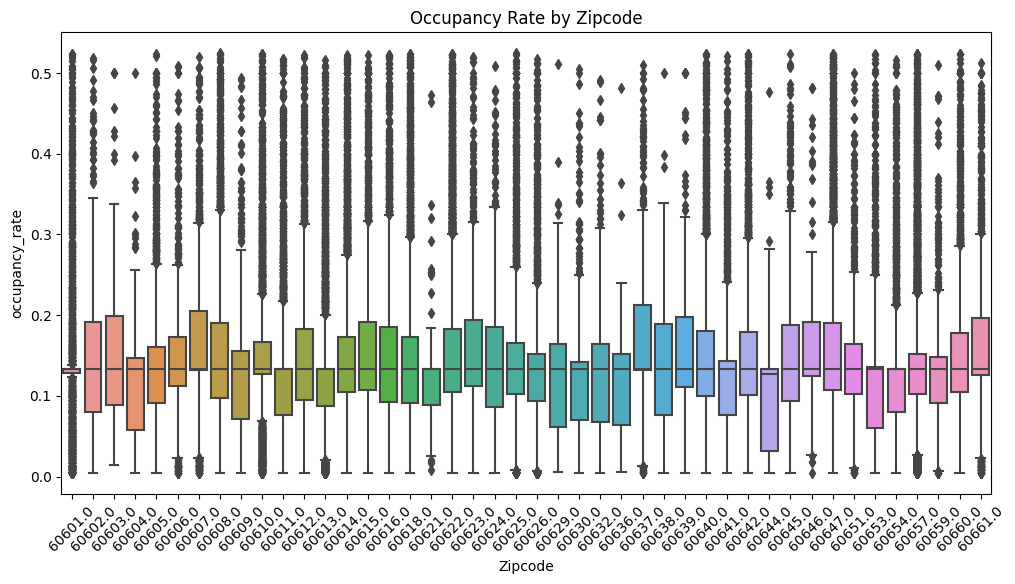

In [88]:
# Visualizing occupancy rate Distribution by Zipcode
plt.figure(figsize=(12, 6))
sns.boxplot(x='Zipcode', y='occupancy_rate', data=geo_datac)
plt.xticks(rotation=45)
plt.title('Occupancy Rate by Zipcode')
plt.show()

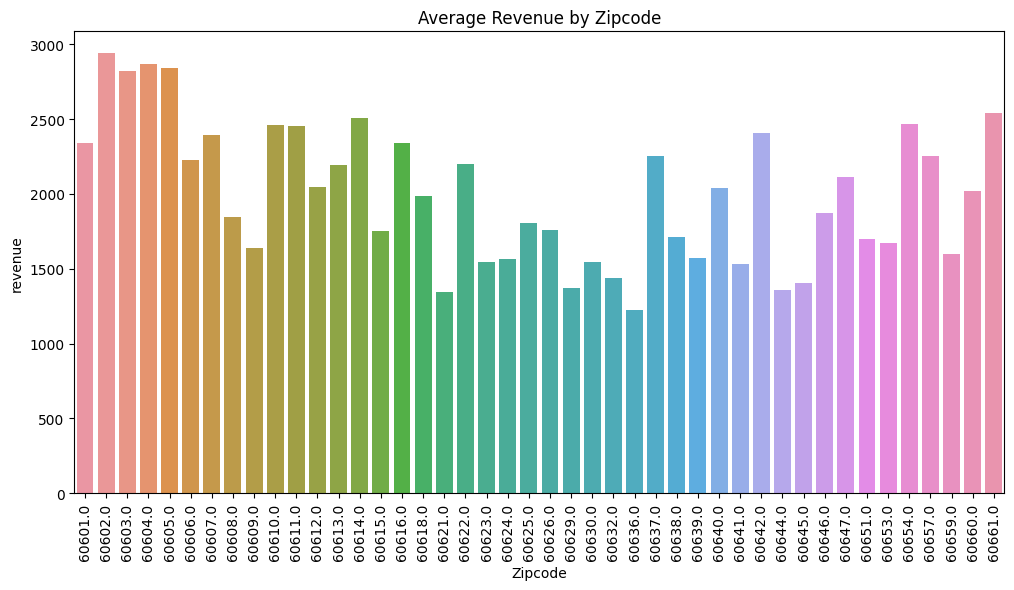

In [89]:
# Grouping data by Zipcode and calculating average revenue
zipcode_revenue = geo_datac.groupby('Zipcode')['revenue'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Zipcode', y='revenue', data=zipcode_revenue)
plt.xticks(rotation=90)
plt.title('Average Revenue by Zipcode')
plt.show()

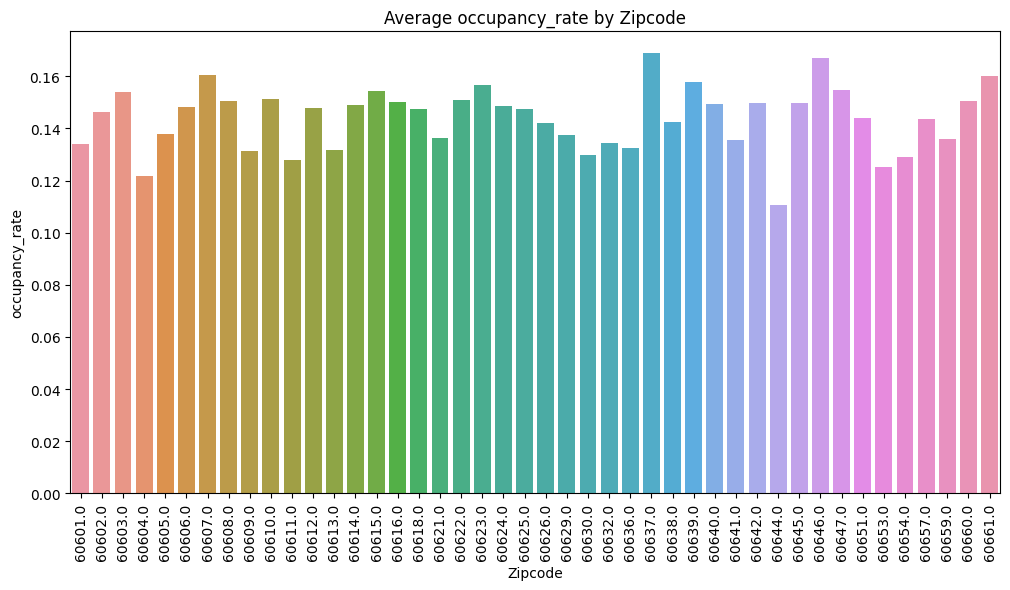

In [90]:
# Grouping data by Zipcode and calculating average occupancy_rate
zipcode_occupancy_rate = geo_datac.groupby('Zipcode')['occupancy_rate'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Zipcode', y='occupancy_rate', data=zipcode_occupancy_rate)
plt.xticks(rotation=90)
plt.title('Average occupancy_rate by Zipcode')
plt.show()

Average Revenue by Zip Code:

The revenue chart shows significant variation across zip codes, indicating that certain areas generate more revenue than others. This could reflect factors such as popularity among travelers, proximity to attractions, or availability of higher-end listings.

Average Occupancy Rate by Zip Code:

The occupancy rate chart also displays variability but does not appear to fluctuate as sharply as revenue. Some zip codes with higher occupancy rates may not necessarily correspond to the ones with the highest revenue.
Inferences Between Occupancy Rate and Revenue:

There isn’t a clear one-to-one correspondence between occupancy rates and revenue. High occupancy does not always equate to high revenue, which may suggest that some areas, despite being frequently booked, have lower nightly rates or smaller properties on average.
Conversely, some zip codes may have a lower occupancy rate but higher revenue, indicating that properties in these areas might be more expensive or larger, catering to a different market segment.

Business Implications:

Areas with high occupancy but lower revenue might benefit from adjustments in pricing strategies or could be targeted for value-added services to increase revenue.
Zip codes with high revenue but lower occupancy rates could be examined to understand why the occupancy is lower—whether due to pricing, seasonal demand, or type of listings available—and strategies can be developed accordingly.

<ipython-input-91-e871a96796c1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = geo_datac[['revenue', 'occupancy_rate', 'Listing Type', 'Property Type']].corr()


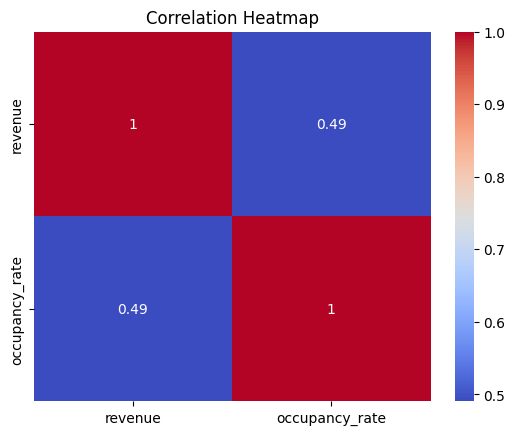

In [91]:
# Correlation matrix
correlation_matrix = geo_datac[['revenue', 'occupancy_rate', 'Listing Type', 'Property Type']].corr()

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##k-means clustering

In [92]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Find the most common Listing Type for each Zipcode
most_common_listing = geo_datac.groupby('Zipcode')['Listing Type'].agg(lambda x: x.mode()[0])

# Then, aggregate occupancy_rate and revenue by Zipcode
zipcode_data = geo_datac.groupby('Zipcode').agg({'occupancy_rate': 'mean', 'revenue': 'mean'})

# Join the most common Listing Type with the aggregated data
zipcode_data = zipcode_data.join(most_common_listing)

# Aggregate data by Zipcode
#zipcode_data = geo_datac.groupby('Zipcode').agg({'occupancy_rate': 'mean', 'revenue': 'mean'}).reset_index()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(zipcode_data[['occupancy_rate', 'revenue']])

print(zipcode_data)

         occupancy_rate      revenue     Listing Type
Zipcode                                              
60601.0        0.133882  2340.895876  Entire home/apt
60602.0        0.146493  2939.072148  Entire home/apt
60603.0        0.154114  2823.428571  Entire home/apt
60604.0        0.121671  2868.810811  Entire home/apt
60605.0        0.137796  2838.189062  Entire home/apt
60606.0        0.148246  2225.077882  Entire home/apt
60607.0        0.160702  2395.161636     Private room
60608.0        0.150567  1842.899346  Entire home/apt
60609.0        0.131203  1640.147497     Private room
60610.0        0.151159  2463.021775  Entire home/apt
60611.0        0.127920  2450.876003  Entire home/apt
60612.0        0.147911  2048.944059  Entire home/apt
60613.0        0.131923  2195.417272  Entire home/apt
60614.0        0.149123  2508.097209  Entire home/apt
60615.0        0.154456  1751.837827     Private room
60616.0        0.150095  2337.359692  Entire home/apt
60618.0        0.147304  198

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

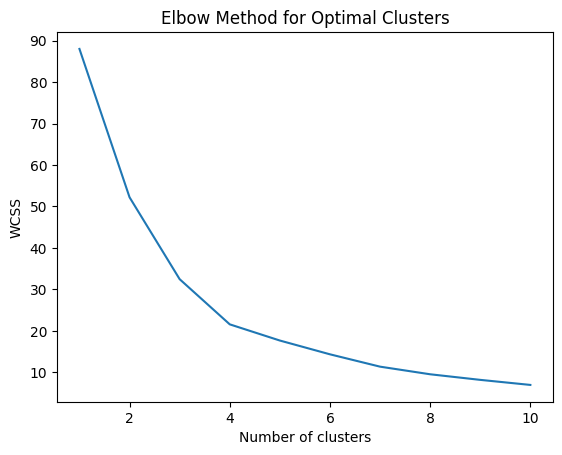

In [93]:
# Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

#Plot the results
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [94]:
# Applying k-Means Clustering
optimal_clusters = 5  # replace with the optimal number from the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
zipcode_data['cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:
       occupancy_rate      revenue  cluster
count        4.000000     4.000000      4.0
mean         0.164122  2266.127181      0.0
std          0.004413   288.169910      0.0
min          0.160033  1871.337209      0.0
25%          0.160535  2159.307394      0.0
50%          0.163814  2325.229546      0.0
75%          0.167402  2432.049333      0.0
max          0.168826  2542.712423      0.0
Cluster 1:
       occupancy_rate      revenue  cluster
count       10.000000    10.000000     10.0
mean         0.130942  1472.950679      1.0
std          0.007978   146.973797      0.0
min          0.110722  1227.850000      1.0
25%          0.130242  1361.670915      1.0
50%          0.133544  1484.397530      1.0
75%          0.135894  1587.185166      1.0
max          0.137337  1673.555026      1.0
Cluster 2:
       occupancy_rate      revenue  cluster
count       15.000000    15.000000     15.0
mean         0.149581  1790.688699      2.0
std          0.004790   215.056164      0.0

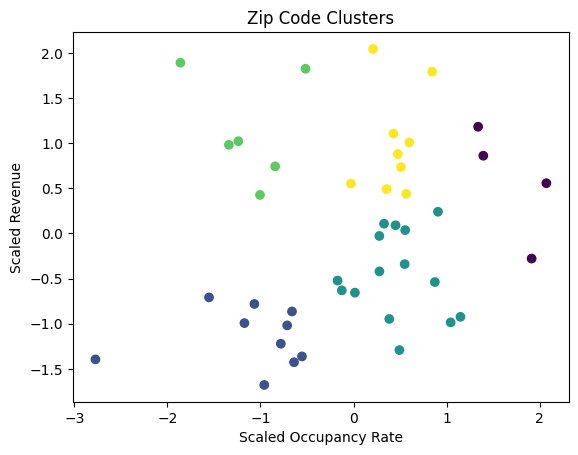

In [95]:
# Analyze the Clusters
for i in range(optimal_clusters):
    cluster = zipcode_data[zipcode_data['cluster'] == i]
    print(f"Cluster {i}:")
    print(cluster.describe())

# Visualizing the clusters (if needed)
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=zipcode_data['cluster'], cmap='viridis')
plt.xlabel('Scaled Occupancy Rate')
plt.ylabel('Scaled Revenue')
plt.title('Zip Code Clusters')
plt.show()


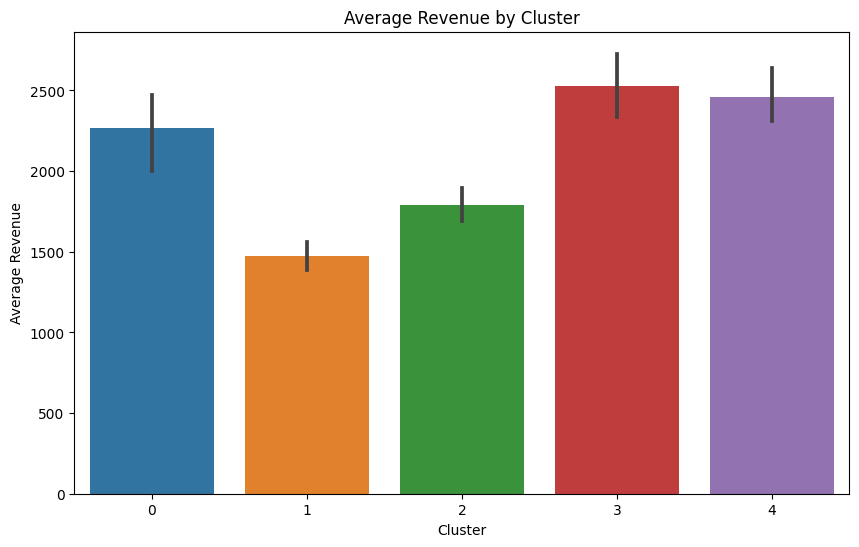

In [96]:
# Creating a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='revenue', data=zipcode_data)
plt.title('Average Revenue by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Revenue')
plt.show()

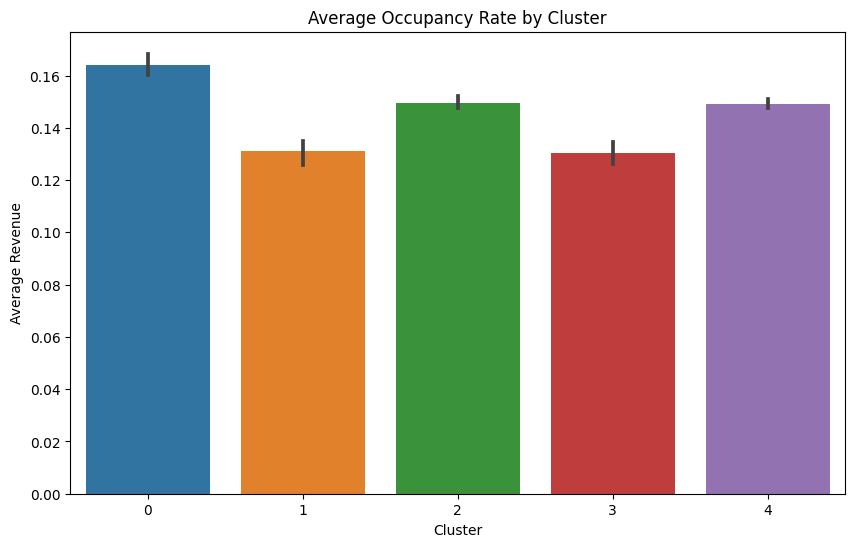

In [97]:
# Creating a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='occupancy_rate', data=zipcode_data)
plt.title('Average Occupancy Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Revenue')
plt.show()

In [98]:
# Assuming 'zipcode_data' contains the 'cluster' column from your k-means clustering
zipcode_data = zipcode_data.reset_index()

# Group by cluster and list zip codes, along with mean occupancy rate and revenue and Listing Type
for cluster in sorted(zipcode_data['cluster'].unique()):
    cluster_group = zipcode_data[zipcode_data['cluster'] == cluster]

    # Displaying cluster information
    print(f"Cluster {cluster}:")
    print("Zip Codes:", cluster_group['Zipcode'].tolist())

    # Most Common Listing Type, Mean Occupancy Rate and Revenue
    avg_occupancy_rate = cluster_group['occupancy_rate'].mean()
    avg_revenue = cluster_group['revenue'].mean()
    most_common_listing_type = cluster_group['Listing Type'].mode()[0]
    print("Most Common Listing Type:", most_common_listing_type)
    print(f"Average Occupancy Rate: {avg_occupancy_rate}")
    print(f"Average Revenue: {avg_revenue}\n")

Cluster 0:
Zip Codes: [60607.0, 60637.0, 60646.0, 60661.0]
Most Common Listing Type: Private room
Average Occupancy Rate: 0.16412192243081014
Average Revenue: 2266.127181104105

Cluster 1:
Zip Codes: [60609.0, 60621.0, 60629.0, 60630.0, 60632.0, 60636.0, 60641.0, 60644.0, 60653.0, 60659.0]
Most Common Listing Type: Private room
Average Occupancy Rate: 0.13094187685321318
Average Revenue: 1472.9506789267134

Cluster 2:
Zip Codes: [60608.0, 60612.0, 60615.0, 60618.0, 60623.0, 60624.0, 60625.0, 60626.0, 60638.0, 60639.0, 60640.0, 60645.0, 60647.0, 60651.0, 60660.0]
Most Common Listing Type: Entire home/apt
Average Occupancy Rate: 0.14958088923706805
Average Revenue: 1790.6886993771043

Cluster 3:
Zip Codes: [60601.0, 60604.0, 60605.0, 60611.0, 60613.0, 60654.0]
Most Common Listing Type: Entire home/apt
Average Occupancy Rate: 0.1303872309323705
Average Revenue: 2527.2125458692794

Cluster 4:
Zip Codes: [60602.0, 60603.0, 60606.0, 60610.0, 60614.0, 60616.0, 60622.0, 60642.0, 60657.0]
Most 

In [99]:
#Now comparing optimal occupancy rate with average occupancy rate of each cluster
optimal_occupancy_rate = 0.13648

for cluster in sorted(zipcode_data['cluster'].unique()):
    cluster_group = zipcode_data[zipcode_data['cluster'] == cluster]

    # Mean Occupancy Rate
    avg_occupancy_rate = cluster_group['occupancy_rate'].mean()

    # Compare with optimal occupancy rate
    if avg_occupancy_rate < optimal_occupancy_rate:
        print(f"Cluster {cluster} (Below Optimal):")
        print(f"Average Occupancy Rate: {avg_occupancy_rate}")
        print("Zip Codes:", cluster_group['Zipcode'].tolist())
        # Add other details you want to display
        print("\n")
    else:
        print(f"Cluster {cluster} (Above or Equal to Optimal):")
        print(f"Average Occupancy Rate: {avg_occupancy_rate}")
        print("Zip Codes:", cluster_group['Zipcode'].tolist())
        # Add other details you want to display
        print("\n")


Cluster 0 (Above or Equal to Optimal):
Average Occupancy Rate: 0.16412192243081014
Zip Codes: [60607.0, 60637.0, 60646.0, 60661.0]


Cluster 1 (Below Optimal):
Average Occupancy Rate: 0.13094187685321318
Zip Codes: [60609.0, 60621.0, 60629.0, 60630.0, 60632.0, 60636.0, 60641.0, 60644.0, 60653.0, 60659.0]


Cluster 2 (Above or Equal to Optimal):
Average Occupancy Rate: 0.14958088923706805
Zip Codes: [60608.0, 60612.0, 60615.0, 60618.0, 60623.0, 60624.0, 60625.0, 60626.0, 60638.0, 60639.0, 60640.0, 60645.0, 60647.0, 60651.0, 60660.0]


Cluster 3 (Below Optimal):
Average Occupancy Rate: 0.1303872309323705
Zip Codes: [60601.0, 60604.0, 60605.0, 60611.0, 60613.0, 60654.0]


Cluster 4 (Above or Equal to Optimal):
Average Occupancy Rate: 0.14925954721683216
Zip Codes: [60602.0, 60603.0, 60606.0, 60610.0, 60614.0, 60616.0, 60622.0, 60642.0, 60657.0]




Clusters Below Optimal Occupancy Rate (Clusters 1 and 3): Strategies should be developed to increase occupancy rates in these areas. This might include marketing initiatives aimed at highlighting local attractions, improving the visibility of listings, or offering competitive pricing. Another approach could be to enhance the quality and range of amenities offered to increase guest satisfaction and repeat bookings.

Clusters At or Above Optimal Occupancy Rate (Clusters 0, 2, and 4): For these clusters, the focus could be on maximizing revenue while maintaining high occupancy rates. This could involve experimenting with slight price increases to gauge elasticity of demand or bundling services and experiences that can justify higher prices. Additionally, these areas could be targeted for property development and investment given their strong performance.bold text

Investment Decisions:

For Lower Performing Clusters (1 and 3): Investors should be cautious and perhaps focus on understanding the reasons behind the lower occupancy rates. If the causes are addressable, such as by improving property features or accessibility, these areas could represent untapped potential.

For Higher Performing Clusters (0, 2, and 4): These areas may represent safer investment opportunities with a stronger track record of high occupancy rates. However, it's important to conduct thorough market analysis to avoid saturation.